In [2]:
from PIL import Image
import numpy as np
import math
import typing
import random

In [3]:
ADJUST_TO_BOTTOM_LEFT = True

In [4]:
def initialize_2dimage(dimensions: tuple, background_color: tuple) -> list:
    return [[background_color for _ in range(dimensions[1])] for _ in range(dimensions[0])]

In [5]:
key_func_x = lambda e: (e[0],e[1])
key_func_y = lambda e: (e[1],e[0])


def line_2d(pixels: list, color: typing.Union[tuple, int], point_1: tuple, point_2: tuple) -> list:
    min_point = min(point_1, point_2, key = key_func_x)
    max_point = max(point_1, point_2, key = key_func_x)
    if min_point[0] == max_point[0]:
        y = min_point[1]
        while y <= max_point[1]:
            pixels[min_point[0]][y] = color
            y += 1
    else:
        error = 0
        x_slope = (max_point[1]-min_point[1])/(max_point[0]-min_point[0])
        if abs(x_slope) > 1:
            y_slope = (max_point[0]-min_point[0])/(max_point[1]-min_point[1])
            min_point = min(point_1, point_2, key = key_func_y)
            max_point = max(point_1, point_2, key = key_func_y)
            y = min_point[1]
            x = min_point[0]
            while y < max_point[1]:
                if error >= 1:
                    x +=1
                    error -=1
                elif error <= -1:
                    x -= 1
                    error += 1
                pixels[x][y] = color
                error += y_slope
                y += 1
        else:
            y = min_point[1]
            x = min_point[0]
            while x < max_point[0]:
                if error >= 1:
                    y +=1
                    error -=1
                elif error <= -1:
                    y -= 1
                    error += 1
                pixels[x][y] = color
                error += x_slope
                x += 1
        pixels[max_point[0]][max_point[1]] = color
    return pixels



In [6]:
def polygon_key_function(point) -> int:
    if not point[0]: 
        if point[0] >= 0: return 90
        else: return 270
    inverse_tan = math.atan(point[1]/point[0])
    if point[0] > 0:
        if point[0] >= 0: return inverse_tan
        else: return 360 + inverse_tan
    else:
        return 180 + inverse_tan  
    


In [7]:
def polygon_2d(pixels: list, border_color: tuple, points: list, background: bool = False, fill_color: tuple = None) -> list:
    if fill_color == None:
        fill_color = border_color
    center = (sum(point[0] for point in points)/len(points), sum(point[1] for point in points)/len(points))
    adjusted_points =[(x-center[0],y-center[1]) for x,y in points]
    adjusted_points.sort(key = polygon_key_function)
    points = [(round(x+center[0]),round(y+center[1])) for x,y in adjusted_points]
    shape = [[0 for _ in range(len(pixels[0]))] for _ in range(len(pixels))]
    for idx, point in enumerate(points):
        shape = line_2d(shape, 1, point, points[idx-1])
        pixels = line_2d(pixels, border_color, point, points[idx-1])
    if background:
        stack = [center]
        while stack:
            x,y = stack[0]
            x,y = round(x), round(y)
            pixels[x][y] = fill_color
            try:
                if not shape[x+1][y]:
                    stack.append((x+1,y))
                    shape[x+1][y] = 1
            except: pass
            try:
                if not shape[x-1][y]:
                    stack.append((x-1, y))
                    shape[x-1][y] = 1
            except: pass
            try:
                if not shape[x][y+1]:
                    stack.append((x, y+1))
                    shape[x][y+1] = 1
            except: pass
            try:
                if not shape[x][y-1]:
                    stack.append((x, y-1))
                    shape[x][y-1] = 1
            except: pass
            stack.pop(0)
    return pixels




In [8]:
def circle_2d(pixels: list, border_color: tuple, center: tuple, radius: int, background: bool = False, fill_color: tuple = None):
    if fill_color == None:
        fill_color = border_color
    increment = 360/(radius*2*math.pi*5)
    degree = 0
    shape = [[0 for _ in range(len(pixels[0]))] for _ in range(len(pixels))]
    while degree <= 360:
        x, y = round(center[0] + math.cos(math.radians(degree))*radius), round(center[1] + math.sin(math.radians(degree))*radius)
        if x >= 0 and y >= 0:
            try:
                pixels[x][y] = border_color
                shape[x][y] = 1
            except:
                pass
        degree += increment
    if background:
        stack = [center]
        while stack:
            x,y = stack[0]
            x,y = round(x), round(y)
            pixels[x][y] = fill_color
            try:
                if not shape[x+1][y] and x+1 >= 0 and y >= 0:
                    
                    stack.append((x+1,y))
                    shape[x+1][y] = 1
            except: pass
            try:
                if not shape[x-1][y] and x-1 >= 0 and y >= 0:
                    stack.append((x-1, y))
                    shape[x-1][y] = 1
            except: pass
            try:
                if not shape[x][y+1] and x >= 0 and y+1 >= 0:
                    stack.append((x, y+1))
                    shape[x][y+1] = 1
            except: pass
            try:
                if not shape[x][y-1] and x >= 0 and y-1 >= 0:
                    stack.append((x, y-1))
                    shape[x][y-1] = 1
            except: pass
            stack.pop(0)
    return pixels


In [9]:
def save_image(pixels: list, image_name: str):
    pixels = list(zip(*pixels))[::-1]
    array = np.array(pixels, dtype=np.uint8)
    new_image = Image.fromarray(array)
    display(new_image)
    new_image.save(image_name + '.png')

In [10]:
def initialize_3dimage(dimensions: tuple):
    return np.zeros(dimensions)

In [11]:
def line_3d(point_1: tuple, point_2: tuple):
    x1, y1, z1 = point_1
    x2, y2, z2 = point_2
    difference_x = abs(x2 - x1)
    difference_y = abs(y2 - y1)
    difference_z = abs(z2 - z1)
    if x2 > x1:
        x_sign = 1
    else:
        x_sign = -1
    if y2 > y1:
        y_sign = 1
    else:
        y_sign = -1
    if z2 > z1:
        z_sign = 1
    else:
        z_sign = -1
    if max(difference_x,difference_y,difference_z) == difference_x:
        y_error = 2*difference_y - difference_x
        z_error = 2*difference_z - difference_x
        yield (x1,y1,z1)
        while x1 != x2:
            x1 += x_sign
            if y_error >= 0:
                y1 += y_sign
                y_error -= 2 * difference_x
            if z_error >= 0:
                z1 += z_sign
                z_error -= 2 * difference_x
            y_error += 2 * difference_y 
            z_error += 2 * difference_z
            yield (x1,y1,z1)
    elif max(difference_x,difference_y,difference_z) == difference_y:
        x_error = 2*difference_x - difference_y
        z_error = 2*difference_z - difference_y
        yield (x1,y1,z1)
        while y1 != y2:
            y1 += y_sign
            if x_error >= 0:
                x1 += x_sign
                x_error -= 2 * difference_y
            if z_error >= 0:
                z1 += z_sign
                z_error -= 2 * difference_y
            x_error += 2 * difference_x 
            z_error += 2 * difference_z
            yield (x1,y1,z1)
    elif max(difference_y,difference_y,difference_z) == difference_z:
        y_error = 2*difference_y - difference_z
        x_error = 2*difference_x - difference_z
        yield (x1,y1,z1)
        while z1 != z2:
            z1 += z_sign
            if y_error >= 0:
                y1 += y_sign
                y_error -= 2 * difference_z
            if x_error >= 0:
                x1 += x_sign
                x_error -= 2 * difference_z
            y_error += 2 * difference_y 
            x_error += 2 * difference_x
            yield (x1,y1,z1)

In [20]:
def view_line(enviornment: np.ndarray, point_1: tuple, difference_x: float, difference_y: float, difference_z: float):
    x_len, y_len, z_len = enviornment.shape
    x1, y1, z1 = point_1
    if difference_x >= 0:
        x_sign = 1
    else:
        x_sign = -1
    if difference_y >= 0:
        y_sign = 1
    else:
        y_sign = -1
    if difference_z >= 0:
        z_sign = 1
    else:
        z_sign = -1
    difference_x = abs(difference_x)
    difference_y = abs(difference_y)
    difference_z = abs(difference_z)
    if max(difference_x,difference_y,difference_z) == difference_x:
        y_error = 2*difference_y - difference_x
        z_error = 2*difference_z - difference_x
        if 0 > x1 or x1 > (x_len-1) or 0 > y1 or y1 > (y_len-1) or 0 > z1 or z1 > (z_len-1):
            return False
        if enviornment[x1,y1,z1]:
            return (x1, y1, z1)
        while True:
            x1 += x_sign
            if y_error >= 0:
                y1 += y_sign
                y_error -= 2 * difference_x
            if z_error >= 0:
                z1 += z_sign
                z_error -= 2 * difference_x
            y_error += 2 * difference_y 
            z_error += 2 * difference_z
            if 0 > x1 or x1 > (x_len-1) or 0 > y1 or y1 > (y_len-1) or 0 > z1 or z1 > (z_len-1):
                return False
            if enviornment[x1,y1,z1]:
                return (x1, y1, z1)
    elif max(difference_x,difference_y,difference_z) == difference_y:
        x_error = 2*difference_x - difference_y
        z_error = 2*difference_z - difference_y
        if 0 > x1 or x1 > (x_len-1) or 0 > y1 or y1 > (y_len-1) or 0 > z1 or z1 > (z_len-1):
            return False
        if enviornment[x1,y1,z1]:
            return (x1, y1, z1)
        while True:
            y1 += y_sign
            if x_error >= 0:
                x1 += x_sign
                x_error -= 2 * difference_y
            if z_error >= 0:
                z1 += z_sign
                z_error -= 2 * difference_y
            x_error += 2 * difference_x 
            z_error += 2 * difference_z
            if 0 > x1 or x1 > (x_len-1) or 0 > y1 or y1 > (y_len-1) or 0 > z1 or z1 > (z_len-1):
                return False
            if enviornment[x1,y1,z1]:
                return (x1, y1, z1)
    elif max(difference_y,difference_y,difference_z) == difference_z:
        y_error = 2*difference_y - difference_z
        x_error = 2*difference_x - difference_z
        if 0 > x1 or x1 > (x_len-1) or 0 > y1 or y1 > (y_len-1) or 0 > z1 or z1 > (z_len-1):
            return False
        if enviornment[x1,y1,z1]:
            return (x1, y1, z1)
        while True:
            z1 += z_sign
            if y_error >= 0:
                y1 += y_sign
                y_error -= 2 * difference_z
            if x_error >= 0:
                x1 += x_sign
                x_error -= 2 * difference_z
            y_error += 2 * difference_y 
            x_error += 2 * difference_x
            if 0 > x1 or x1 > (x_len-1) or 0 > y1 or y1 > (y_len-1) or 0 > z1 or z1 > (z_len-1):
                return False
            if enviornment[x1,y1,z1]:
                return (x1, y1, z1)

In [13]:
class camera:
    def __init__(self, fov: int, vertical_fov: int, resolution: tuple, location: tuple, direction: tuple):
        self.fov = fov
        self.vertical_fov = vertical_fov
        self.resolution = resolution
        self.location = location
        self.direction = direction

In [24]:
def render_from_camera(image: list, camera: camera, enviornment: np.ndarray, color_keys):
    x_angle, y_angle, z_angle = camera.direction
    x_angle, y_angle = x_angle-camera.fov/2, y_angle-camera.vertical_fov/2
    save_y_angle = y_angle
    for x in range(camera.resolution[0]):
        print(x)
        y_angle = save_y_angle
        for y in range(camera.resolution[1]):
            x_difference, y_difference, z_difference = math.sin(math.radians(x_angle))/math.cos(math.radians(x_angle)),math.sin(math.radians(y_angle))/math.cos(math.radians(y_angle)),math.sin(math.radians(z_angle))/math.cos(math.radians(z_angle))
            point = view_line(enviornment, camera.location, x_difference, y_difference, z_difference)
            if point:
                xt,yt,zt = point
                image[x][y] = color_keys[int(enviornment[xt,yt,zt])]
            y_angle += camera.vertical_fov /camera.resolution[1]
        x_angle += camera.fov / camera.resolution[0]
    return image


In [15]:
r = lambda: random.randint(0,499)
rc = lambda: (random.randint(0,255),random.randint(0,255),random.randint(0,255))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

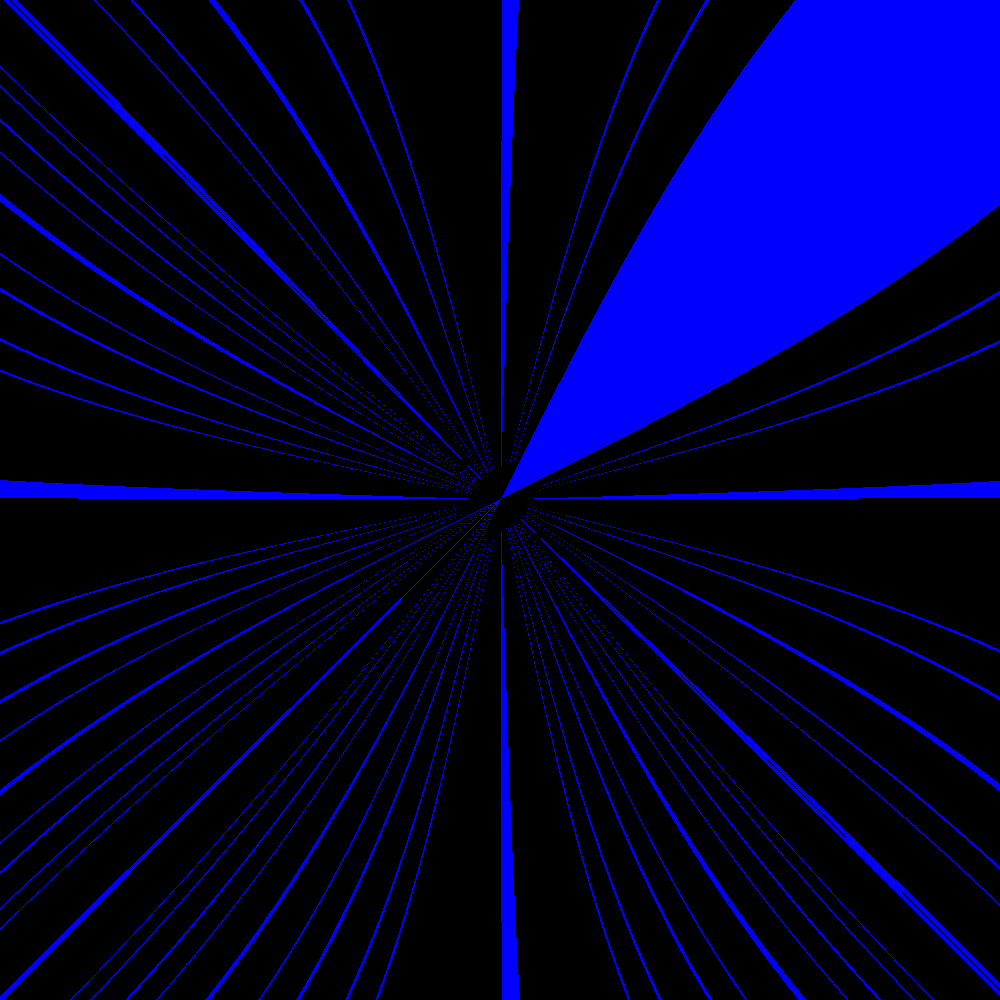

In [31]:
enviornment = initialize_3dimage((500,500,500))
for x in range(10):
    for y in range(10):
        for point in line_3d((x*50,y*50,50),(x*50,y*50,450)):
            xt,yt,zt = point
            enviornment[xt,yt,zt] = 1
color_keys = [None, (0,0,255)]
cam1 = camera(90, 90, (1000,1000), (249,249,249), (0,0,0))
image = initialize_2dimage((1000,1000),(0,0,0))
image = render_from_camera(image, cam1, enviornment, color_keys)
save_image(image,"line")

image = initialize_2dimage((1000,1000),(0,0,0))
import random

#p = 10000
#for x in range(50):
#    l = [(r(),r()) for _ in range(p)]
#    image = polygon_2d(image, rc(), l)
size = 500
for x in range(49):
    image = circle_2d(image, rc(), (r(),r()), size, background = True, fill_color = rc())
    size -= 10

#print(image)
save_image(image,"line")

In [ ]:
def rotate_polygon3_3d(polygon_points: list, rotation: tuple):
    center_x, center_y, center_z = sum(point[0] for point in polygon_points)/len(polygon_points), sum(point[1] for point in polygon_points)/len(polygon_points), sum(point[2] for point in polygon_points)/len(polygon_points)
    rotated_points = []
    for points in polygon_points:
        difference_x, difference_y, difference_z = points[0] - center_x, points[1] - center_y, points[1] - center_z
        x_angle = math.degrees(math.atan(difference_x)) + rotation[0]
        y_angle = math.degrees(math.atan(difference_y)) + rotation[1]
        z_angle = math.degrees(math.atan(difference_z)) + rotation[2]
        new_point = (round(math.sin(math.radians(x_angle))/math.cos(math.radians(x_angle))),round(math.sin(math.radians(y_angle))/math.cos(math.radians(y_angle))),round(math.sin(math.radians(z_angle))/math.cos(math.radians(z_angle))))
        rotated_points.append(new_point)
    return rotated_points



In [2]:
def line_3d(point_1: tuple, point_2: tuple):
    x1, y1, z1 = point_1
    x2, y2, z2 = point_2
    difference_x = abs(x2 - x1)
    difference_y = abs(y2 - y1)
    difference_z = abs(z2 - z1)
    if x2 > x1:
        x_sign = 1
    else:
        x_sign = -1
    if y2 > y1:
        y_sign = 1
    else:
        y_sign = -1
    if z2 > z1:
        z_sign = 1
    else:
        z_sign = -1
    if max(difference_x,difference_y,difference_z) == difference_x:
        y_error = 2*difference_y - difference_x
        z_error = 2*difference_z - difference_x
        yield (x1,y1,z1)
        while x1 != x2:
            x1 += x_sign
            if y_error >= 0:
                y1 += y_sign
                y_error -= 2 * difference_x
            if z_error >= 0:
                z1 += z_sign
                z_error -= 2 * difference_x
            y_error += 2 * difference_y 
            z_error += 2 * difference_z
            yield (x1,y1,z1)
    elif max(difference_x,difference_y,difference_z) == difference_y:
        x_error = 2*difference_x - difference_y
        z_error = 2*difference_z - difference_y
        yield (x1,y1,z1)
        while y1 != y2:
            y1 += y_sign
            if x_error >= 0:
                x1 += x_sign
                x_error -= 2 * difference_y
            if z_error >= 0:
                z1 += z_sign
                z_error -= 2 * difference_y
            x_error += 2 * difference_x 
            z_error += 2 * difference_z
            yield (x1,y1,z1)
    elif max(difference_y,difference_y,difference_z) == difference_z:
        y_error = 2*difference_y - difference_z
        x_error = 2*difference_x - difference_z
        yield (x1,y1,z1)
        while z1 != z2:
            z1 += z_sign
            if y_error >= 0:
                y1 += y_sign
                y_error -= 2 * difference_z
            if x_error >= 0:
                x1 += x_sign
                x_error -= 2 * difference_z
            y_error += 2 * difference_y 
            x_error += 2 * difference_x
            yield (x1,y1,z1)

In [ ]:
class camera:
    def __init__(self, fov: int, vertical_fov: int, resolution: tuple, location: tuple, direction: tuple):
        self.fov = fov
        self.vertical_fov = vertical_fov
        self.resolution = resolution
        self.location = location
        self.direction = direction

In [ ]:
class mesh3D:

    def __init__(self, planes: list, properties: dict, material: typing.Union[str, tuple], consistent_color: bool = True):
        self.planes = planes
        self.material = material
        self.properties = properties
        self.consistent_color = consistent_color

    def render_point_by_point(self):
        for plane in self.planes:
            ax, ay, az = plane[0]
            bx, by, bz = plane[1]
            cx, cy, cz = plane[2] 
            vector1 = np.array(ax-bx, ay-by, az-bz)
            vector2 = np.array(ax-cx, ay-cy, az-cz)
            angle = np.cross(vector1, vector2)
            border_points = []
            for idx, point in enumerate(plane):
                yield (point, angle)
                




In [ ]:
def perspective_projection(camera: camera, object_list):
    